In [6]:
from keras import models
from keras import layers
from keras import optimizers
import numpy as np

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Data prepare

Use image data generator read the image

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = r"kaggle_dataset\cats_and_dogs_small\train"
validation_dir = r"kaggle_dataset\cats_and_dogs_small\validation"
test_dir = r"kaggle_dataset\cats_and_dogs_small\test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), 
                                                      batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


train the model

In [10]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30


C:\Users\jjjay\AppData\Local\Temp\ipykernel_19012\2124789366.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100,


100/100 [==============================] - 38s 381ms/step - loss: 0.6910 - acc: 0.5405 - val_loss: 0.7040 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 27s 274ms/step - loss: 0.6775 - acc: 0.5650 - val_loss: 0.6796 - val_acc: 0.5520
Epoch 3/30
100/100 [==============================] - 32s 316ms/step - loss: 0.6555 - acc: 0.6025 - val_loss: 0.6713 - val_acc: 0.5740
Epoch 4/30
100/100 [==============================] - 37s 366ms/step - loss: 0.6358 - acc: 0.6350 - val_loss: 0.6821 - val_acc: 0.5690
Epoch 5/30
100/100 [==============================] - 41s 412ms/step - loss: 0.6014 - acc: 0.6745 - val_loss: 0.6131 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 33s 330ms/step - loss: 0.5810 - acc: 0.6910 - val_loss: 0.6332 - val_acc: 0.6230
Epoch 7/30
100/100 [==============================] - 30s 304ms/step - loss: 0.5490 - acc: 0.7070 - val_loss: 0.6365 - val_acc: 0.6590
Epoch 8/30
100/100 [==============================] - 33s 334ms/st

Store the model

In [11]:
model.save('cats_and_dogs_small_1.h5')

e:\anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


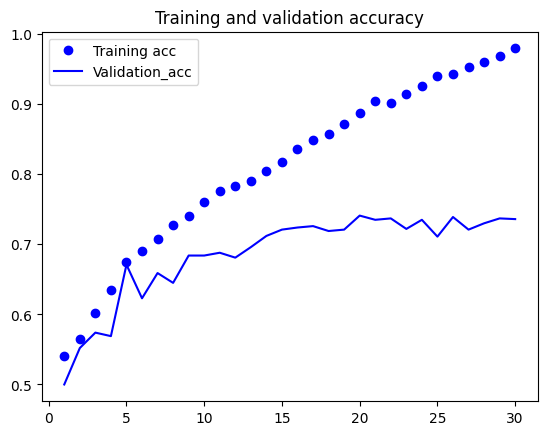

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()